In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
eda_gold_challenge = pd.read_csv('data.csv', encoding='ISO-8859-1')
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
eda_gold_challenge.mean(numeric_only=True)

HS               0.422280
Abusive          0.382945
HS_Individual    0.271471
HS_Group         0.150809
HS_Religion      0.060217
HS_Race          0.042980
HS_Physical      0.024527
HS_Gender        0.023236
HS_Other         0.284000
HS_Weak          0.256891
HS_Moderate      0.129471
HS_Strong        0.035918
dtype: float64

In [4]:
eda_gold_challenge.median()

HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [5]:
eda_gold_challenge.count(numeric_only=True)

HS               13169
Abusive          13169
HS_Individual    13169
HS_Group         13169
HS_Religion      13169
HS_Race          13169
HS_Physical      13169
HS_Gender        13169
HS_Other         13169
HS_Weak          13169
HS_Moderate      13169
HS_Strong        13169
dtype: int64

In [6]:
eda_gold_challenge.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
eda_gold_challenge['total_char'] = eda_gold_challenge['Tweet'].apply(len)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89


In [8]:
def split_sentence(s):
    return len(s.split())

eda_gold_challenge['total_word'] = eda_gold_challenge['Tweet'].apply(split_sentence)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14


In [9]:
eda_gold_challenge.var()

HS                  0.243978
Abusive             0.236316
HS_Individual       0.197789
HS_Group            0.128075
HS_Religion         0.056595
HS_Race             0.041136
HS_Physical         0.023928
HS_Gender           0.022698
HS_Other            0.203360
HS_Weak             0.190913
HS_Moderate         0.112717
HS_Strong           0.034630
total_char       4771.441271
total_word        104.693271
dtype: float64

In [10]:
eda_gold_challenge.std()

HS                0.493941
Abusive           0.486123
HS_Individual     0.444735
HS_Group          0.357876
HS_Religion       0.237898
HS_Race           0.202819
HS_Physical       0.154685
HS_Gender         0.150659
HS_Other          0.450954
HS_Weak           0.436935
HS_Moderate       0.335733
HS_Strong         0.186092
total_char       69.075620
total_word       10.231973
dtype: float64

In [11]:
eda_gold_challenge.skew()

HS               0.314743
Abusive          0.481659
HS_Individual    1.027865
HS_Group         1.951762
HS_Religion      3.697803
HS_Race          4.507363
HS_Physical      6.148549
HS_Gender        6.329997
HS_Other         0.958113
HS_Weak          1.112960
HS_Moderate      2.207621
HS_Strong        4.988423
total_char       0.693625
total_word       0.786909
dtype: float64

In [12]:
eda_gold_challenge.kurtosis()

HS               -1.901226
Abusive          -1.768273
HS_Individual    -0.943638
HS_Group          1.809650
HS_Religion      11.675521
HS_Race          18.319105
HS_Physical      35.810092
HS_Gender        38.074647
HS_Other         -1.082184
HS_Weak          -0.761437
HS_Moderate       2.874027
HS_Strong        22.887838
total_char       -0.401174
total_word       -0.149516
dtype: float64

In [13]:
eda_gold_challenge.corr()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
HS,1.000000,0.368595,0.713998,0.492912,0.296077,0.247873,0.185471,0.180405,0.736651,0.687713,0.451079,0.225765,-0.148950,-0.129296
Abusive,0.368595,1.000000,0.289782,0.148622,0.070476,-0.028304,0.196235,0.187492,0.264936,0.313377,0.188486,-0.097490,-0.212749,-0.194017
HS_Individual,0.713998,0.289782,1.000000,-0.257246,0.035690,-0.000549,0.213400,0.182398,0.637545,0.963186,-0.235414,0.058354,-0.140994,-0.119682
HS_Group,0.492912,0.148622,-0.257246,1.000000,0.364294,0.342798,-0.009207,0.022328,0.224446,-0.247776,0.915132,0.239084,-0.030366,-0.029724
HS_Religion,0.296077,0.070476,0.035690,0.364294,1.000000,0.095878,-0.002993,0.024522,-0.159422,0.035277,0.343558,0.083226,-0.005674,0.003535
HS_Race,0.247873,-0.028304,-0.000549,0.342798,0.095878,1.000000,-0.028763,-0.020260,-0.133467,-0.007199,0.239469,0.242798,-0.057099,-0.048548
HS_Physical,0.185471,0.196235,0.213400,-0.009207,-0.002993,-0.028763,1.000000,0.053750,-0.099867,0.220254,0.000265,-0.025330,-0.043721,-0.035512
HS_Gender,0.180405,0.187492,0.182398,0.022328,0.024522,-0.020260,0.053750,1.000000,-0.097139,0.189647,0.029100,-0.018936,-0.024621,-0.017160
HS_Other,0.736651,0.264936,0.637545,0.224446,-0.159422,-0.133467,-0.099867,-0.097139,1.000000,0.606733,0.225106,0.124581,-0.110261,-0.102027
HS_Weak,0.687713,0.313377,0.963186,-0.247776,0.035277,-0.007199,0.220254,0.189647,0.606733,1.000000,-0.226747,-0.113487,-0.131945,-0.108991


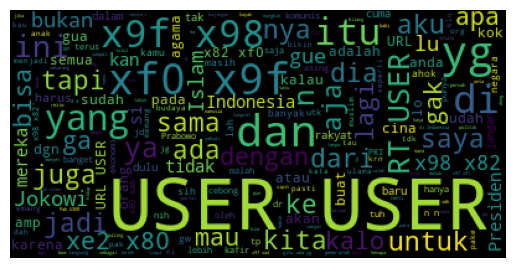

In [14]:
from wordcloud import WordCloud
Tweet = ' '.join(eda_gold_challenge['Tweet'])
wordcloud = WordCloud().generate(Tweet)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='total_word', ylabel='total_char'>

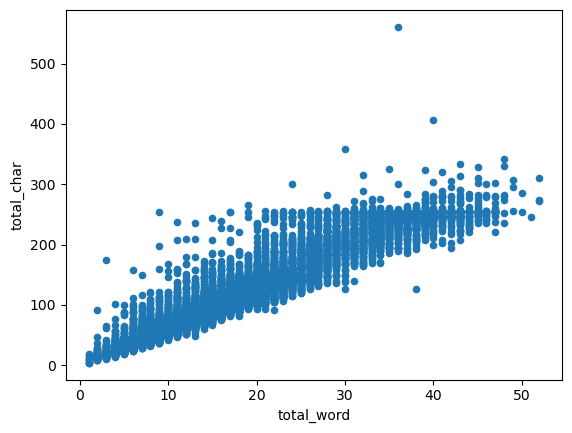

In [15]:
eda_gold_challenge.plot(x='total_word', y='total_char', kind='scatter')

In [16]:
eda_gold_challenge.tail(20)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
13149,RT USER: Foto ke 3:\n\nPohon tempat koloni mon...,0,0,0,0,0,0,0,0,0,0,0,0,154,20
13150,USER Tambahan : \nArsitektur Universitas Katol...,0,0,0,0,0,0,0,0,0,0,0,0,69,8
13151,USER USER Komnasham sontoloyo',1,1,0,1,0,0,0,0,1,0,1,0,30,4
13152,Rizieq shihab fpi jancok asu kontol tempek anj...,1,1,0,1,1,0,0,1,0,0,0,1,159,24
13153,"wilujeng beurang.. ; Dan siapapun kita, latar ...",0,0,0,0,0,0,0,0,0,0,0,0,223,32
13154,Adik tengok sekeliling. Macam mana adik nak ca...,0,0,0,0,0,0,0,0,0,0,0,0,169,27
13155,USER USER Makannya w suruh baca APBN ..biar ga...,1,1,1,0,0,0,0,0,1,1,0,0,230,39
13156,Presiden Joko Widodo (Jokowi) masuk daftar The...,0,0,0,0,0,0,0,0,0,0,0,0,214,25
13157,"USER Pak Recep..............anda salah, itu gu...",1,0,1,0,0,0,0,0,1,1,0,0,141,20
13158,Maaf sianu mah cocoknya sama mustafa kemal alm...,0,0,0,0,0,0,0,0,0,0,0,0,52,8


In [17]:
eda_gold_challenge.shape

(13169, 15)

In [18]:
eda_gold_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
 13  total_char     13169 non-null  int64 
 14  total_word     13169 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 1.5+ MB


In [19]:
eda_gold_challenge.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,114.202749,17.282102
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,69.075620,10.231973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000


In [20]:
eda_gold_challenge.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
total_char       0
total_word       0
dtype: int64

In [21]:
from unidecode import unidecode

def replace_ascii(s):
    return unidecode(s)

def remove_ascii2(s):
    newText = re.sub(r'\\x[A-Za-z0-9./]+',' ', unidecode(s))
    return newText

eda_gold_challenge['CleanTweet'] = eda_gold_challenge['Tweet'].apply(remove_ascii2)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [22]:
def removeBytesText(s):
    newText = re.sub(r'\\x.{2}',' ', s)
    return newText

eda_gold_challenge['CleanTweet1'] = eda_gold_challenge['CleanTweet'].apply(removeBytesText)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet,CleanTweet1
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc...","41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...


In [23]:
eda_gold_challenge.drop(eda_gold_challenge.columns[15], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet1
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [24]:
def removeNewLine(s):
    newText = re.sub(r'\n',' ', s)
    return newText

eda_gold_challenge['CleanTweet2'] = eda_gold_challenge['CleanTweet1'].apply(removeNewLine)
eda_gold_challenge.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet1,CleanTweet2
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61,10,USER jangan asal ngomong ndasmu. congor lu yg ...,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28,5,USER Kasur mana enak kunyuk',USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62,9,USER Hati hati bisu :( .g\n\nlagi bosan huft ...,USER Hati hati bisu :( .g\n\nlagi bosan huft ...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135,22,USER USER USER USER Bom yang real mudah terdet...,USER USER USER USER Bom yang real mudah terdet...
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0,53,10,"USER Mana situ ngasih("": itu cuma foto ya kuti...","USER Mana situ ngasih("": itu cuma foto ya kuti..."


In [25]:
eda_gold_challenge.drop(eda_gold_challenge.columns[15], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet2
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [26]:
def removeNewLineText(s):
    newText = re.sub(r'\\n.{0}',' ', s)
    return newText

eda_gold_challenge['CleanTweet3'] = eda_gold_challenge['CleanTweet2'].apply(removeNewLineText)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet2,CleanTweet3
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc...","41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAP...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...


In [27]:
eda_gold_challenge.drop(eda_gold_challenge.columns[15], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet3
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAP...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [28]:
def removePunc(s):
    newText = re.sub(r'[^\w\s]',' ',s)
    return newText

eda_gold_challenge['CleanTweet4'] = eda_gold_challenge['CleanTweet3'].apply(removePunc)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet3,CleanTweet4
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER: USER siapa yang telat ngasih tau elu?...,RT USER USER siapa yang telat ngasih tau elu ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 Kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAP...,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAP...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...


In [29]:
eda_gold_challenge.drop(eda_gold_challenge.columns[15], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet4
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER USER siapa yang telat ngasih tau elu ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,41 Kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAP...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [30]:
def removeMoreSpace(s):
    newText = re.sub('  +', '', s)
    return newText

eda_gold_challenge['CleanTweet'] = eda_gold_challenge['CleanTweet4'].apply(removeMoreSpace)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet4,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USER USER siapa yang telat ngasih tau elu ...,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,41 Kadang aku berfikir kenapa aku tetap perc...,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKU KU TAU MATAMU SIPIT TAP...,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...,USER USER Kaum cebong kapir udah keliatan dong...


In [31]:
eda_gold_challenge.drop(eda_gold_challenge.columns[15], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [32]:
eda_gold_challenge.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,114.202749,17.282102
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,69.075620,10.231973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000


In [33]:
eda_gold_challenge.shape

(13169, 16)

In [34]:
len(eda_gold_challenge['Tweet'][0])

138

In [35]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,0,0,0,0,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [36]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [37]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [38]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [39]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [40]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [41]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [42]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [43]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [44]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Moderate,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [45]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,HS_Strong,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,0,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,0,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [46]:
eda_gold_challenge.drop(eda_gold_challenge.columns[1], axis=1, inplace=True)
eda_gold_challenge.head()

,Tweet,total_char,total_word,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,RT USERUSER siapa yang telat ngasih tau elu ed...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,41Kadang aku berfikirkenapa aku tetap percaya ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,USER USER AKU ITU AKUKU TAU MATAMU SIPIT TAPI ...
4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,USER USER Kaum cebong kapir udah keliatan dong...


In [47]:
eda_gold_challenge.corr()

,total_char,total_word
total_char,1.000000,0.954934
total_word,0.954934,1.000000


<AxesSubplot:>

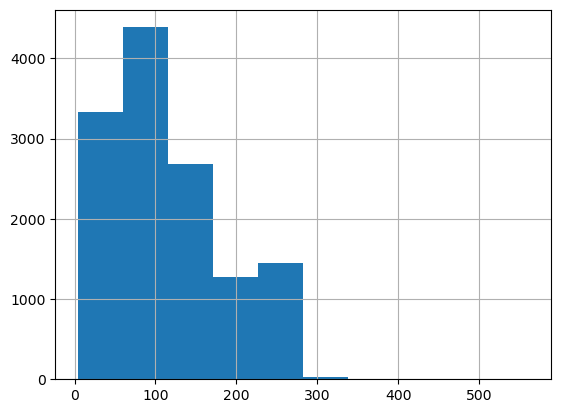

In [56]:
eda_gold_challenge.total_char.hist()

<AxesSubplot:>

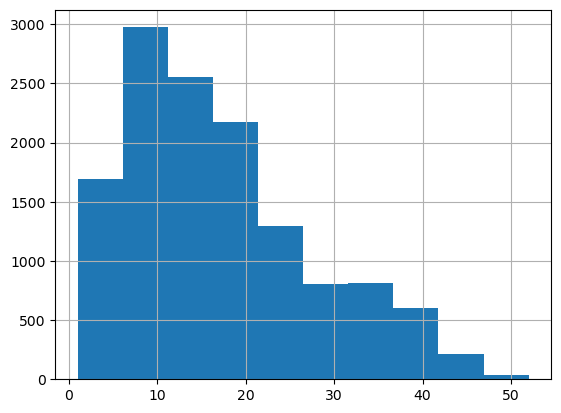

In [57]:
eda_gold_challenge.total_word.hist()

In [48]:
eda_gold_challenge.describe()

,total_char,total_word
count,13169.000000,13169.000000
mean,114.202749,17.282102
std,69.075620,10.231973
min,4.000000,1.000000
25%,59.000000,9.000000
50%,100.000000,15.000000
75%,152.000000,23.000000
max,561.000000,52.000000


## FROM DATAFRAME TO SQLITE3

In [49]:
conn = sqlite3.connect('C:/Users/User/Binar/Gold Binar Academy/data/Challenge.db')
sql = 'SELECT * FROM Challenge_Data;'
eda_gold_challenge_db = pd.read_sql(sql, conn)
conn.close()
eda_gold_challenge_db

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,CleanTweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,RT USER USER siapa yang telat ngasih tau elued...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 Kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAP...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,USER USER Kaum cebong kapir udah keliatan dong...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,USER jangan asal ngomong ndasmu congor lu yg s...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,USER Kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,USER Hati hati bisugnnlagi bosan huft
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,USER USER USER USER Bom yang real mudah terdet...


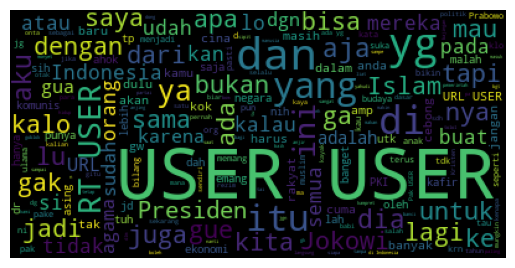

In [58]:
CleanTweet = ' '.join(eda_gold_challenge_db['CleanTweet']) #menggabungkan semua text dalam dataframe, menjadi satu string
wordcloud = WordCloud().generate(CleanTweet)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [51]:
def clasify_label(hs):
    label = ''
    if int(hs) == 1:
        label = 'positive'
    else:
        label = 'negative'
    return label

eda_gold_challenge_db['hs_label'] = eda_gold_challenge_db['HS'].apply(clasify_label)
eda_gold_challenge_db.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,CleanTweet,hs_label
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...,positive
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,RT USER USER siapa yang telat ngasih tau elued...,negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 Kadang aku berfikir kenapa aku tetap percay...,negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAP...,negative
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,USER USER Kaum cebong kapir udah keliatan dong...,positive


<AxesSubplot:xlabel='hs_label', ylabel='count'>

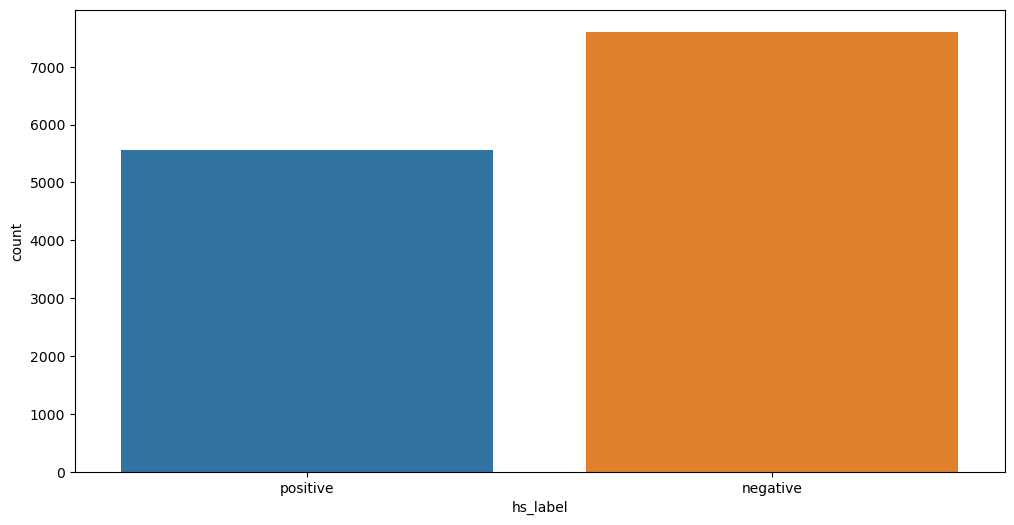

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='hs_label', data=eda_gold_challenge_db)

<AxesSubplot:>

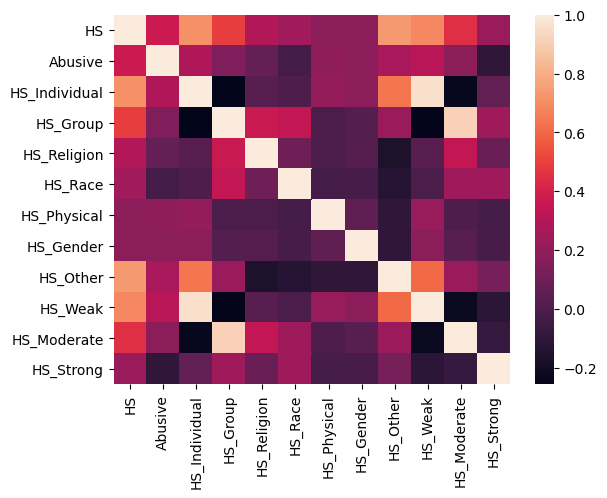

In [53]:
corr = eda_gold_challenge_db.corr()
sns.heatmap(corr)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_word', ylabel='Density'>

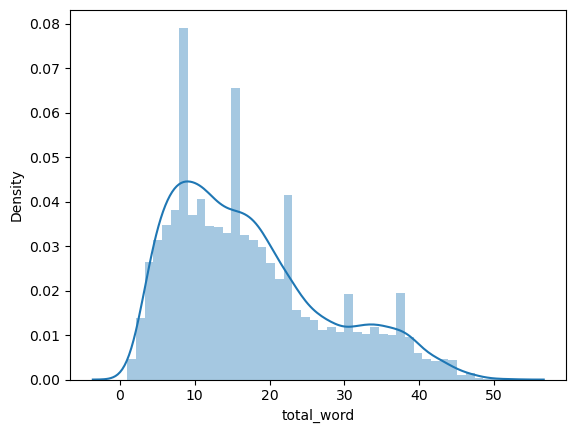

In [54]:
sns.distplot(eda_gold_challenge.total_word)